In [1]:
import sys
sys.path.append(r"C:/Users/Matthieu/Documents/_Travail/Stages/Stage M1/Workspace/cooperation_emergence/")

from plot import plot_histogram, \
      plot_hist_by_phenotype, plot_triadic_pattern_phenotype, plot_bar_diadic_pattern, \
      plot_xhi_by_phenotype, plot_diadic_pattern, plot_phenotype_combination_per_triangle, \
      plot_phenotype_combination_per_link
from analysis import histogram, measure_global, compute_xhi, compute_xhi_mean, compute_all_xhi_mean
from graph import Network
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from dataset import Dataset, measure_frequency_diadic_pattern, \
      measure_global_frequency_triadic_pattern, \
      measure_triadic_pattern_phenotype_combination, measure_diadic_pattern_combination
import os
import networkx as nx

import pymc as pm
import arviz as az

C:\Users/Matthieu/Documents/_Travail/Stages/Stage M1/Workspace/cooperation_emergence\graph.py:286: SyntaxWarning: invalid escape sequence '\i'
  and S \in [0, 10]


In [2]:
file = r"../out/test/SITH_E3O2P21R12T17_Empty_L10_C200_S50_T0.25_444675.h5"
net = Network()
net.reload_with_hdf5(file)

parameters = net.parameters
inter = parameters["Number of interaction"]
n = parameters["Community size"]
save = False

dirname = "Size_effect_T5/"
if save:
    os.makedirs("../plot/" + dirname + str(n) + "/", exist_ok=True)

In [3]:
t, l = net.get_trust_adjacency_matrix(), net.get_link_adjacency_matrix()
print(f"Number of interaction: ", inter)
print("Asymmetry rate: ", measure_global("Asymmetry", t, l, parameters))
print("Individual asymmetry rate: ", measure_global("Individual asymmetry", t, l, parameters))
print("Out preserving ind. asymmetry: ", measure_global("Individual asymmetry", t, l, parameters, random=True, niter=1000, mode="o"))
print("Saturation rate: ", measure_global("Saturation rate", t, l, parameters))
link_stat = measure_global("Number of link", t, l, parameters)
print("Mean number of link per agent: ", link_stat[0])
print("Standard deviation number of link per agent: ", link_stat[1])
print("Mean number of interaction per link: ", 2 * inter / (n * (n-1)))
tri_pattern_freq = measure_global_frequency_triadic_pattern(l.astype(int), parameters, inter)
dtga = tri_pattern_freq.group_by("Transitive").aggregate("Number")
data = dtga.get_item(True).get_item("Number").get_all_item().values()
transitivity_rate = sum(data) / (n * (n-1) * (n-2) / 6)
print("Transitiviy rate: ", transitivity_rate)

Number of interaction:  444675
Asymmetry rate:  0.8093385214007782
Individual asymmetry rate:  0.16999999999999998
Out preserving ind. asymmetry:  0.22
Saturation rate:  0.0
Mean number of link per agent:  6.12
Standard deviation number of link per agent:  19.93188400528159
Mean number of interaction per link:  363.0
Transitiviy rate:  0.012755102040816327


In [4]:
local_dt = Dataset("local", inter)
local_dt.init_with_network(net)

TypeError: unsupported operand type(s) for /: 'float' and 'dict'

### Trust distribution

C:\Users/Matthieu/Documents/_Travail/Stages/Stage M1/Workspace/cooperation_emergence\plot.py:86: SyntaxWarning: invalid escape sequence '\e'
  ax[selector].plot(t_norm, model(t_norm, popt[0]), color="tab:orange", label="Fit ($\eta$ = {})".format(round(popt[0], 2)))


TypeError: '<=' not supported between instances of 'NoneType' and 'NoneType'

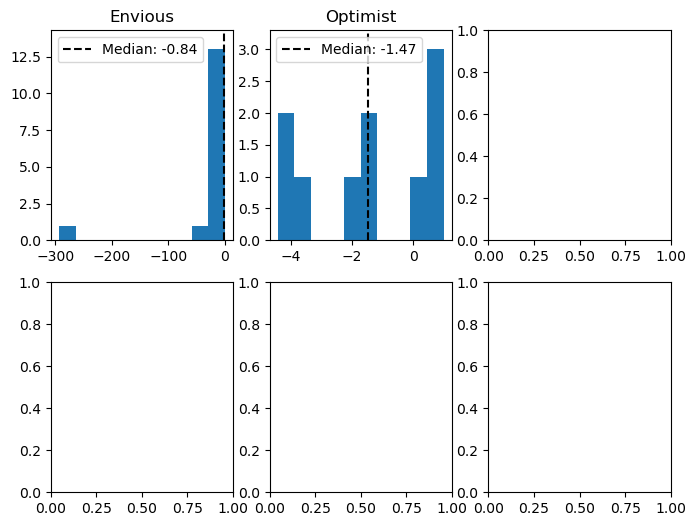

In [31]:
plot_hist_by_phenotype(local_dt, "Eta")
if save:
    plt.savefig("../plot/" + dirname  + str(n) + "/eta_histograms.png")
else:
    plt.show()

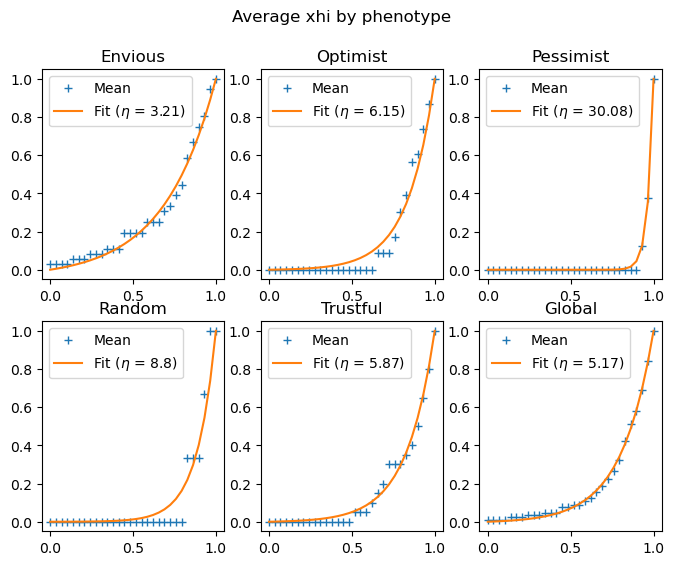

In [32]:
all_xhi = compute_all_xhi_mean(t, parameters)
plot_xhi_by_phenotype(all_xhi)
if save:
    plt.savefig("../plot/" + dirname   + str(n) + "/average_xhi_by_phenotype.png")
else:
    plt.show()

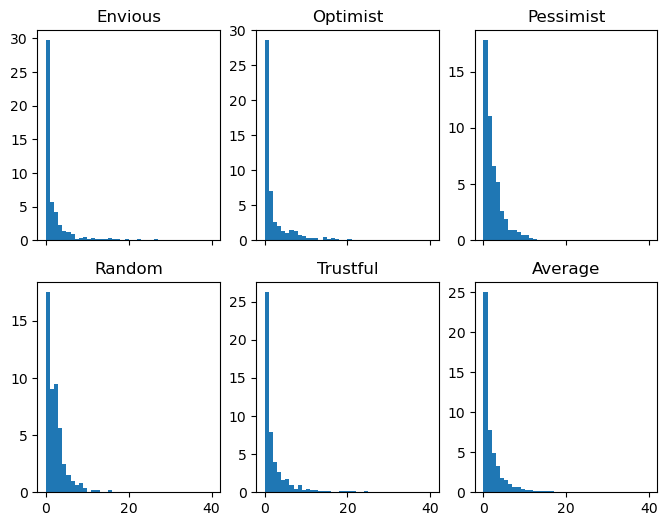

In [33]:
ph_mean = histogram(t, parameters)
fig, ax = plot_histogram(ph_mean, parameters, log=False, color="tab:blue")
plt.show()

### Centrality

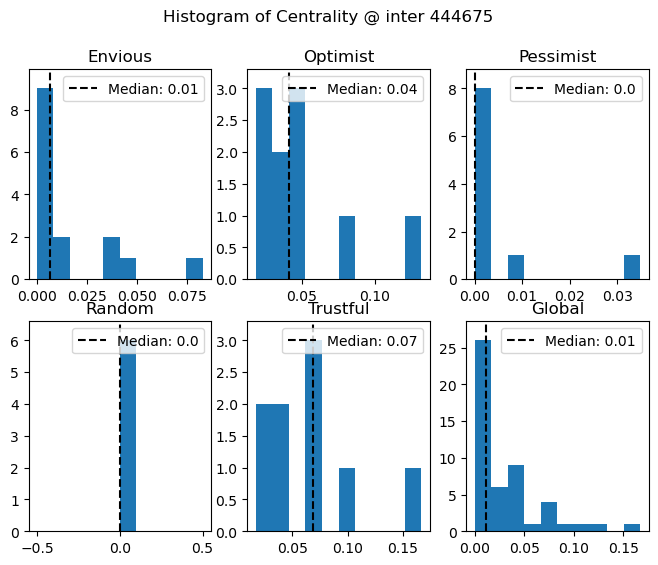

In [34]:
plot_hist_by_phenotype(local_dt, "Centrality")
if save:
    plt.savefig("../plot/" + dirname + str(n) + "/Centrality histograms.png")
else:
    plt.show()

### Diadic pattern

In [35]:
di_pattern_freq = measure_frequency_diadic_pattern(l, net.phenotypes_table, inter)

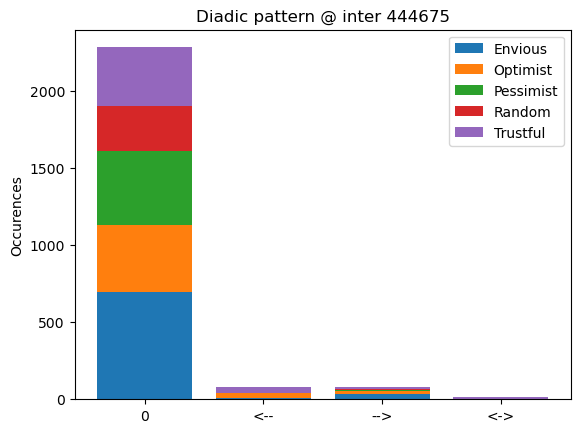

In [36]:
plot_bar_diadic_pattern(di_pattern_freq)
if save:
    plt.savefig("../plot/" + dirname + str(n) + "/diadic_pattern_bar.png")
else:
    plt.show()

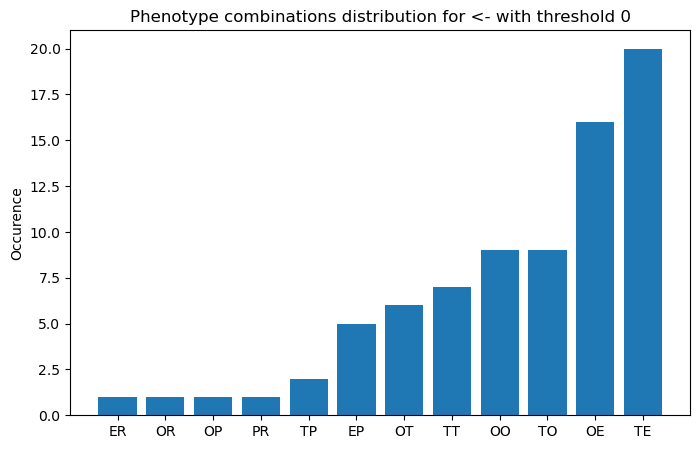

In [37]:
diadic_comb = measure_diadic_pattern_combination(l.astype(int), net.phenotypes_table, inter)
plot_phenotype_combination_per_link('<-', diadic_comb, 0)
plt.show()

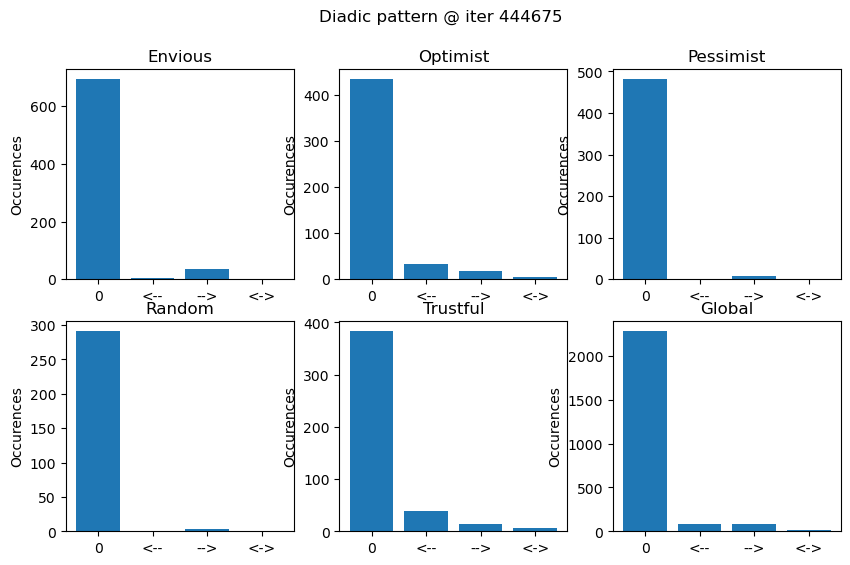

In [38]:
plot_diadic_pattern(di_pattern_freq)
plt.show()

### Triadic pattern

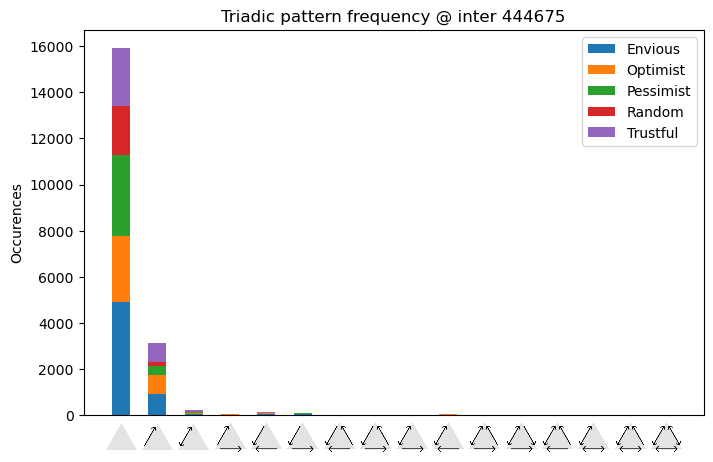

In [39]:
plot_triadic_pattern_phenotype(tri_pattern_freq, parameters)
if save:
    plt.savefig("../plot/" + dirname + str(n) + "/triadic_pattern_bar.png")
else:
    plt.show()

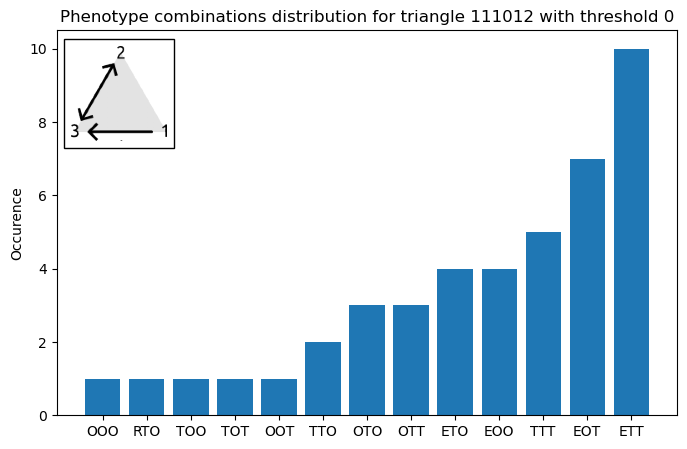

In [49]:
ph_comb_dt = measure_triadic_pattern_phenotype_combination(l.astype(int), parameters, inter)
plot_phenotype_combination_per_triangle("111012", ph_comb_dt, 0)
plt.show()

### Clustering analysis

In [41]:
G = nx.from_numpy_array(l)
communities = list(nx.community.girvan_newman(G))

In [42]:
print(len(communities))
print(net.phenotypes_table)
print(communities[20])

42
['Envious', 'Envious', 'Envious', 'Envious', 'Envious', 'Envious', 'Envious', 'Envious', 'Envious', 'Envious', 'Envious', 'Envious', 'Envious', 'Envious', 'Envious', 'Optimist', 'Optimist', 'Optimist', 'Optimist', 'Optimist', 'Optimist', 'Optimist', 'Optimist', 'Optimist', 'Optimist', 'Pessimist', 'Pessimist', 'Pessimist', 'Pessimist', 'Pessimist', 'Pessimist', 'Pessimist', 'Pessimist', 'Pessimist', 'Pessimist', 'Random', 'Random', 'Random', 'Random', 'Random', 'Random', 'Trustful', 'Trustful', 'Trustful', 'Trustful', 'Trustful', 'Trustful', 'Trustful', 'Trustful', 'Trustful']
({0, 42, 3}, {32, 1, 33}, {2, 19}, {4}, {12, 5, 46}, {14, 6, 15}, {7}, {8}, {9, 25}, {10, 18}, {11}, {13, 23}, {16, 41}, {17, 22}, {24, 43, 20, 31}, {48, 45, 44, 21}, {26}, {27}, {28}, {29}, {37, 30}, {34}, {35}, {36}, {38}, {39}, {40}, {47}, {49})


In [47]:
depth = 15
comm = communities[depth]
phenotype_distrib_per_comm = {}
node_color = np.zeros(n)
labels = {i:"" for i in range(n)}
community_number = 0
phenotype_table = net.phenotypes_table
for c in comm:
    phenotype_distrib_per_comm[community_number] = {
        "Envious":0,
        "Optimist": 0,
        "Pessimist": 0,
        "Random": 0,
        "Trustful": 0,
    }
    for index in c:
        phenotype_distrib_per_comm[community_number][phenotype_table[index]] += 1
        node_color[index] = community_number
        labels[index] = phenotype_table[index][0]
    community_number += 1

print(phenotype_distrib_per_comm)

{0: {'Envious': 2, 'Optimist': 0, 'Pessimist': 0, 'Random': 0, 'Trustful': 1}, 1: {'Envious': 1, 'Optimist': 0, 'Pessimist': 3, 'Random': 0, 'Trustful': 0}, 2: {'Envious': 1, 'Optimist': 1, 'Pessimist': 0, 'Random': 0, 'Trustful': 0}, 3: {'Envious': 1, 'Optimist': 0, 'Pessimist': 0, 'Random': 0, 'Trustful': 0}, 4: {'Envious': 2, 'Optimist': 0, 'Pessimist': 0, 'Random': 0, 'Trustful': 1}, 5: {'Envious': 2, 'Optimist': 1, 'Pessimist': 0, 'Random': 0, 'Trustful': 0}, 6: {'Envious': 1, 'Optimist': 2, 'Pessimist': 1, 'Random': 0, 'Trustful': 1}, 7: {'Envious': 1, 'Optimist': 0, 'Pessimist': 0, 'Random': 0, 'Trustful': 0}, 8: {'Envious': 1, 'Optimist': 0, 'Pessimist': 1, 'Random': 0, 'Trustful': 0}, 9: {'Envious': 1, 'Optimist': 1, 'Pessimist': 0, 'Random': 0, 'Trustful': 0}, 10: {'Envious': 1, 'Optimist': 3, 'Pessimist': 0, 'Random': 0, 'Trustful': 4}, 11: {'Envious': 1, 'Optimist': 1, 'Pessimist': 0, 'Random': 0, 'Trustful': 0}, 12: {'Envious': 0, 'Optimist': 1, 'Pessimist': 0, 'Random': 0

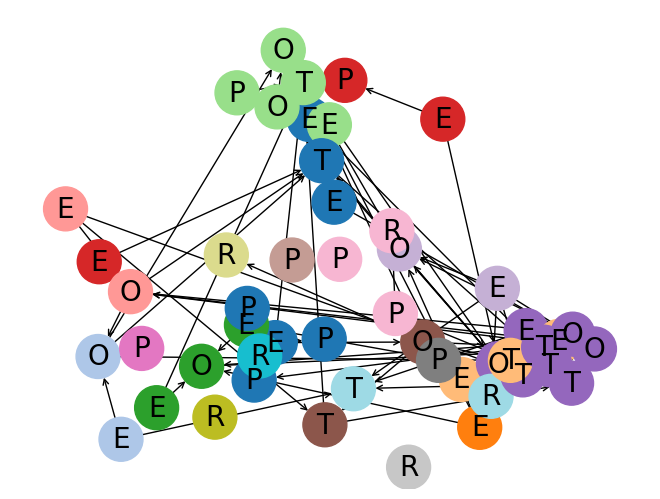

In [48]:
# Compute positions for the node clusters as if they were themselves nodes in a
# supergraph using a larger scale factor
supergraph = nx.cycle_graph(len(comm))
superpos = nx.spring_layout(G, k=1, scale=10)

# Use the "supernode" positions as the center of each node cluster
centers = list(superpos.values())
pos = {}
for center, com in zip(centers, comm):
    pos.update(nx.spring_layout(nx.subgraph(G, com), k=0.5, center=center, scale=2))
nx.draw(
        G,
        pos=pos,
        node_size=1000,
        node_color=node_color,
        arrowstyle="->",
        arrowsize=10,
        with_labels=True,
        arrows=True,
        font_size=20,
        font_color="black",
        labels=labels,
        cmap=plt.cm.tab20
    )

### Bayesian stuff

Estimated eta:  6.6574840480971105


<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Matthieu\AppData\Local\Temp\ipykernel_16880\2716832538.py:11: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel("$\chi(t)$")


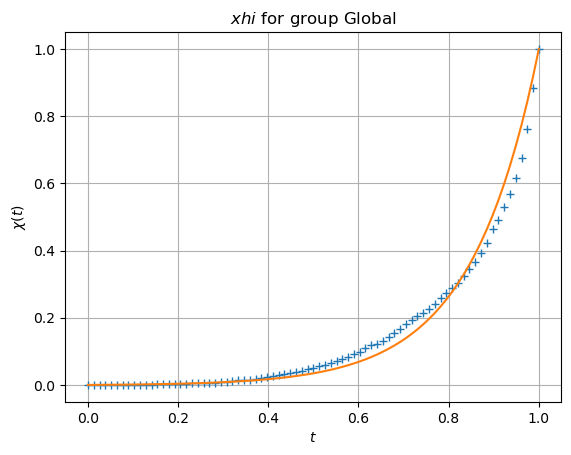

In [ ]:
selector = "Global"
xhi_mean = compute_xhi_mean(t, parameters, ph_selector=selector)
size = xhi_mean.size
t_norm = np.arange(size)/(size-1)
model = lambda i, eta:  (np.exp(eta * i) - 1) / (np.exp(eta) - 1)
popt, copt = curve_fit(model, t_norm, xhi_mean)
print("Estimated eta: ", popt[0])
plt.plot(t_norm, xhi_mean, "+", label="data")
plt.plot(t_norm, model(t_norm, popt[0]), label="model")
plt.xlabel("$t$")
plt.ylabel("$\chi(t)$")
plt.title("$xhi$ for group {}".format(selector))
plt.grid()
plt.show()

In [ ]:
xhi_mean = compute_xhi_mean(t, parameters)
size = xhi_mean.size
t_norm = np.arange(size) / (size-1)
with pm.Model() as model:
    # Priors
    sigma = pm.HalfCauchy("sigma", beta=10)
    etas = pm.Normal("etas", mu=2.5, sigma=4)

    # Likelihood
    likelihood = pm.Normal("xhi mean", mu= (np.exp(etas * t_norm) - 1) / (np.exp(etas) - 1), sigma=sigma, observed=xhi_mean)

    # Inference
    idata = pm.sample(3000, progressbar=False)

Initializing NUTS using jitter+adapt_diag...


KeyboardInterrupt: 

In [ ]:
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
etas,9.919,0.083,9.756,10.070,0.001,0.001,12288.0,8707.0,1.0
sigma,0.018,0.001,0.016,0.019,0.000,0.000,12043.0,8707.0,1.0


In [ ]:
pp = pm.sample_posterior_predictive(idata, model, progressbar=False)
idata.extend(pp)

Sampling: [xhi mean]


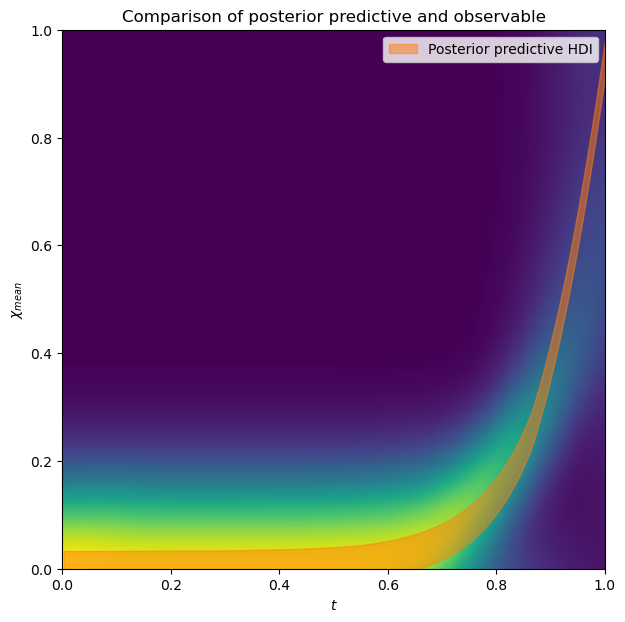

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
az.plot_kde(t_norm, xhi_mean, contour=False, ax=ax, label="Observed data KDE", fill_kwargs={"alpha": 0.1})
az.plot_hdi(t_norm, idata.posterior_predictive["xhi mean"], fill_kwargs={"label": "Posterior predictive HDI"})
ax.set_xlim((0, 1))
ax.set_ylim((0, 1))
ax.set_xlabel("$t$")
ax.set_ylabel("$\\chi_{mean}$")
ax.set_title("Comparison of posterior predictive and observable")
plt.legend()
plt.show()